In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
%load_ext google.colab.data_table

In [1]:
!pip install plotly

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## <strong>EDA to business.pkl file</strong>

In [2]:
# Read the the file business.pkl
buss = pd.read_pickle('/content/drive/MyDrive/Yelp/business.pkl')

# Print the table
print("Table: \n")
display(buss.head())

# Print the info
display(buss.info())

Table: 



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

None

In [3]:
# Some is repeated, we delete them
buss = buss.loc[:,~buss.columns.duplicated()].copy()

#
buss.reset_index(drop=True, inplace=True)

#print first five records
display(buss.head())

# Print the info
display(buss.info())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 16.1+ MB


None

### We plot the null to delete later

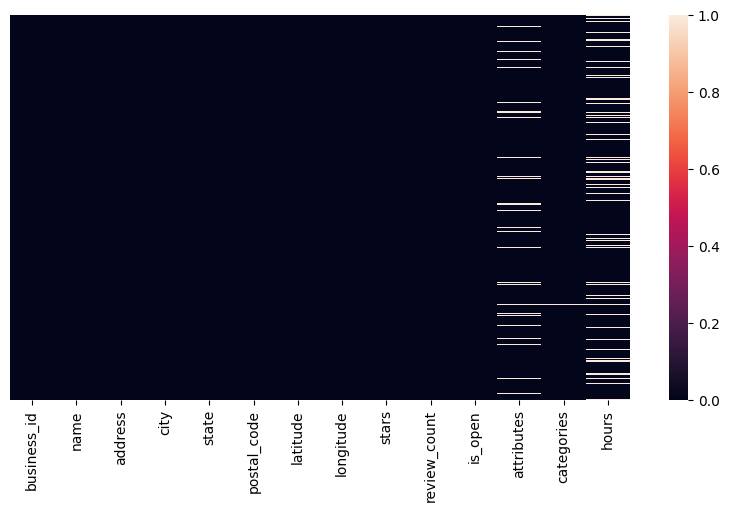

In [4]:
# plot the null values
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=buss.isnull(), yticklabels=False)

plt.show()

In [5]:
# Check out duplicated valued in business_id column
buss['business_id'].duplicated().value_counts()

False    150346
Name: business_id, dtype: int64

In [6]:
# Drop the hours column
try:
  for column_name in ['hours', 'postal_code']:
    buss.drop(columns=[column_name], axis=1, inplace=True)
except Exception as e:
  print(e)

# Drop nulls in attributes column
try:
  buss.dropna(subset=['attributes'], inplace=True)
  buss.reset_index(drop=True, inplace=True)
except Exception as e:
  print(e)

# Drop nulls in state column
try:
  buss.dropna(subset=['state'], inplace=True)
  buss.reset_index(drop=True, inplace=True)
except Exception as e:
  print(e)

### Filtering by restaurants and food categories we get the business target

In [7]:
rest = buss[buss['categories'].str.contains('Restaurants|Food', na=False, regex=True)].copy()
rest['categories'] = rest['categories'].apply(lambda val: str(val).split(', '))
rest

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","[Brewpubs, Breweries, Food]"
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","[Burgers, Fast Food, Sandwiches, Food, Ice Cre..."
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","[Pubs, Restaurants, Italian, Bars, American (T..."
5,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","[Ice Cream & Frozen Yogurt, Fast Food, Burgers..."
...,...,...,...,...,...,...,...,...,...,...,...,...
136582,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","[Cafes, Juice Bars & Smoothies, Coffee & Tea, ..."
136583,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,PA,32.409552,-110.943073,4.5,41,1,"{'BusinessParking': '{'garage': False, 'street...","[Specialty Food, Food, Coffee & Tea, Coffee Ro..."
136590,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","[Restaurants, Mexican]"
136592,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","[Restaurants, Comfort Food, Food, Food Trucks,..."


In [8]:
# We create a dataframe with dummie data from multicategorical column (attributes),
# Business: Restaurants
attributesRest_dummies = pd.get_dummies(rest['attributes'].explode()).groupby(level=0).sum()
attributesRest_dummies.insert(0, "business_id", rest['business_id'])
attributesRest_dummies.insert(0, "stars", rest['stars'])
attributesRest_dummies

,stars,business_id,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
0,4.0,MTSW4McQd7CbVtyjqoe9mw,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
1,4.5,mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,2.0,CF33F8-E6oudUQ46HnavjQ,0,0,1,1,0,0,0,1,...,0,1,1,1,1,1,1,0,1,1
4,3.0,k0hlBqXX-Bt0vf1op7Jr1w,0,0,1,1,0,0,0,0,...,0,1,1,1,1,0,1,0,0,1
5,1.5,bBDDEgkFA1Otx9Lfe7BZUQ,0,0,1,0,0,0,0,0,...,0,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136582,4.0,cM6V90ExQD6KMSU3rRB5ZA,0,0,1,1,0,0,0,1,...,0,1,1,1,1,0,1,0,0,1
136583,4.5,1jx1sfgjgVg0nM6n3p0xWA,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,1
136590,4.5,WnT9NIzQgLlILjPT0kEcsQ,0,0,1,1,0,0,0,1,...,0,1,1,1,1,1,1,0,1,1
136592,4.5,2O2K6SXPWv56amqxCECd4w,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0


In [9]:
# We create a dataframe with dummie data from multicategorical columns (categories)
# Business: Restaurants
catRest_dummies = pd.get_dummies(rest['categories'].explode()).groupby(level=0).sum()
catRest_dummies.insert(0, "business_id", rest['business_id'])

In [10]:
# Drop the attribute and categories columns due they are in dummies
# Restaurants data
try:
  for column_name in ['attributes', 'categories']:
    rest.drop(columns=[column_name], axis=1, inplace=True)
except Exception as e:
  print(e)

In [11]:
# Set the right data type
rest['review_count'] = rest['review_count'].apply(lambda x: int(x))
rest['is_open'] = rest['is_open'].apply(lambda x: int(x))
rest['stars'] = rest['stars'].apply(lambda x: float(x))
rest['latitude'] = rest['latitude'].apply(lambda x: float(x))
rest['longitude'] = rest['longitude'].apply(lambda x: float(x))
rest['city'] = rest['city'].apply(lambda x: x.upper())

In [12]:
#Plot the locations of bussiness

import plotly.express as px

fig = px.scatter_mapbox(rest, lat="latitude", lon="longitude", zoom=4, height=700)
#hover_name="City", hover_data=["State", "Population"],
#color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

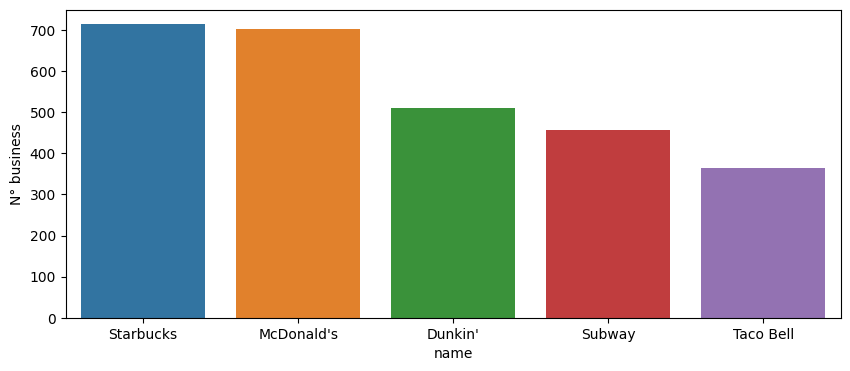

In [13]:
#the most numerous business
#Restaurants data
the_most = rest.groupby(by='name', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='name', y='business_id')
plt.ylabel('N° business')

plt.show()

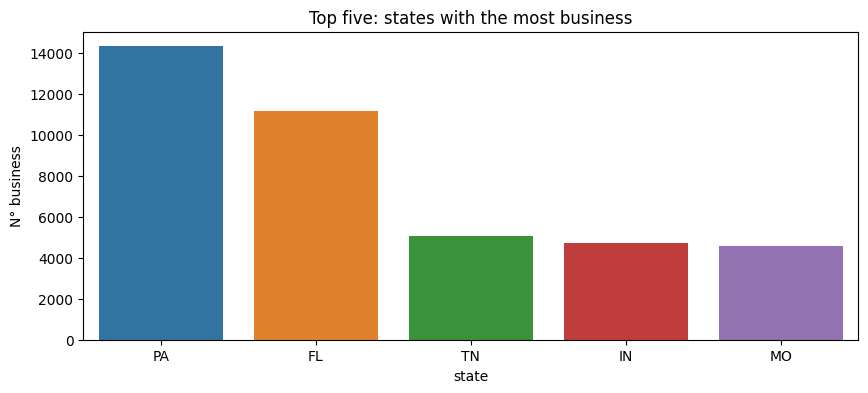

In [14]:
#State with the most of business
#Restaurants data
the_most = rest.groupby(by='state', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='state', y='business_id')
plt.ylabel('N° business')
plt.title("Top five: states with the most business")

plt.show()

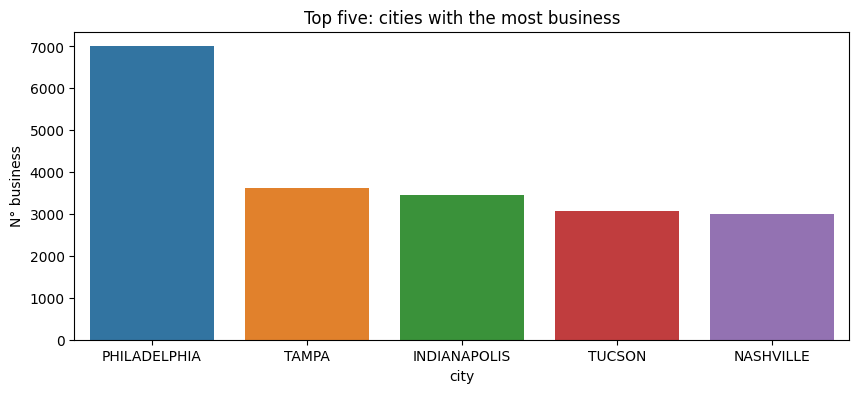

In [15]:
#City with the most of business
# Restaurants data
the_most = rest.groupby(by='city', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='city', y='business_id')
plt.ylabel('N° business')
plt.title("Top five: cities with the most business")

plt.show()

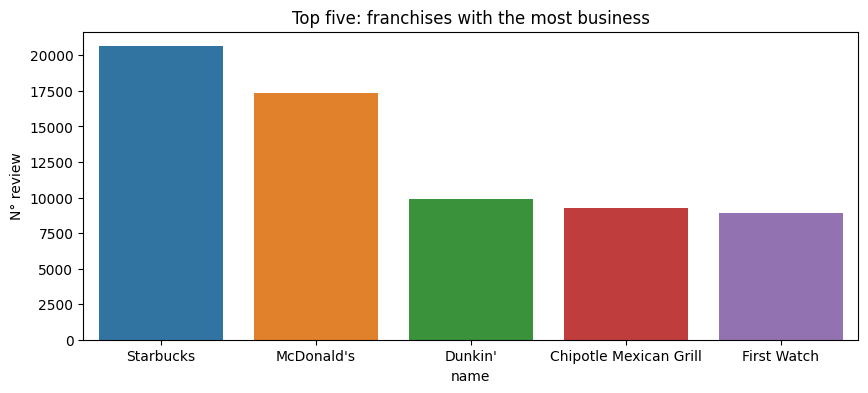

In [16]:
# The most reviewed business
the_most = rest.groupby(by='name', as_index=False).sum(numeric_only=True).sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'review_count'), x='name', y='review_count')
plt.ylabel('N° review')
plt.title("Top five: franchises with the most business")

plt.show()

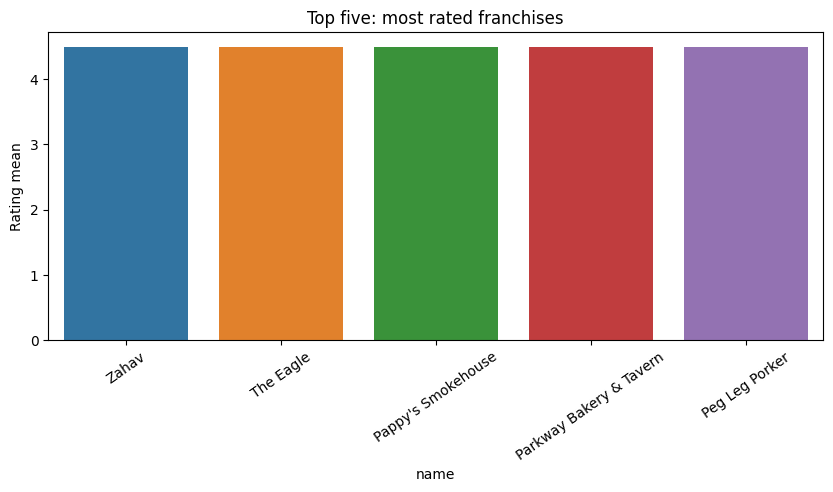

In [17]:
# The most rated business with review_count greater than 2000
the_most = rest[rest['review_count']>2000].groupby(by='name', as_index=False).mean(numeric_only=True).sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'stars'), x='name', y='stars')
plt.ylabel('Rating mean')
plt.xticks(rotation=35)
plt.title("Top five: most rated franchises")

plt.show()

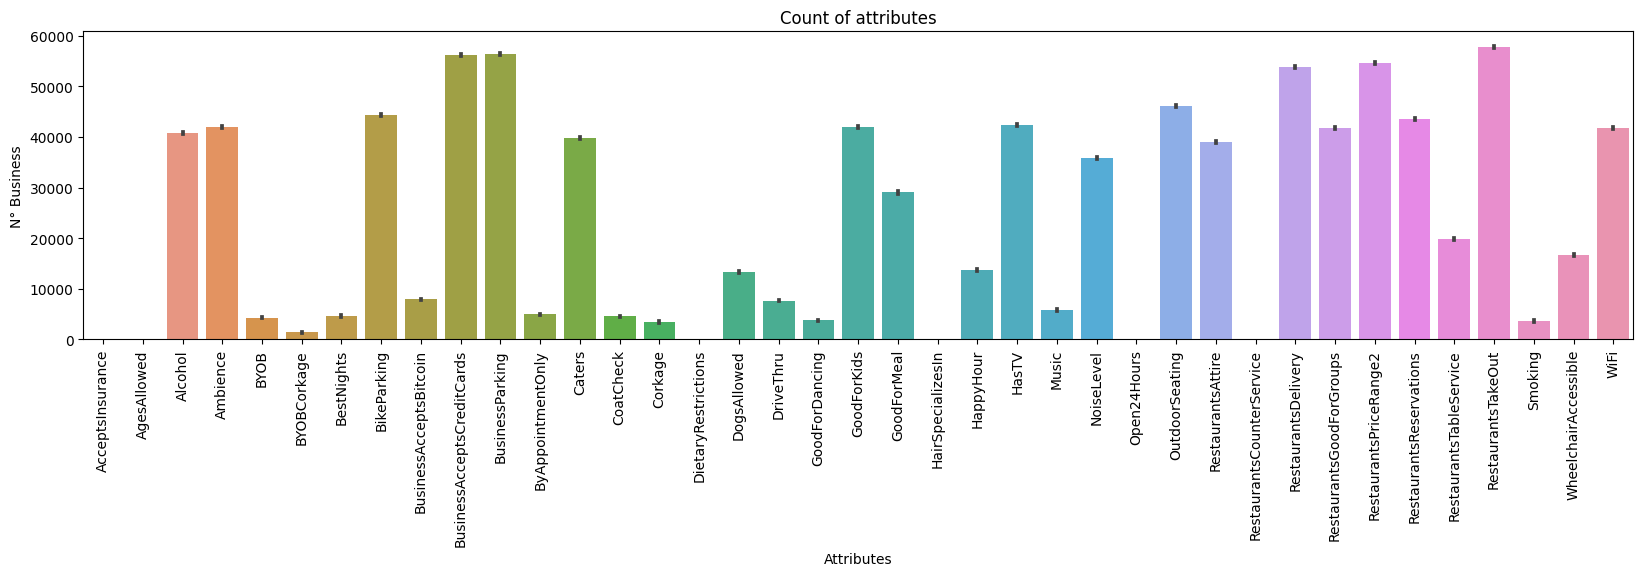

In [18]:
plt.figure(figsize=(20,4), dpi=100)
ax = sns.barplot(
    data=attributesRest_dummies.drop(columns=['business_id', 'stars']),
    estimator='sum'
)
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('N° Business')
plt.title('Count of attributes')

plt.show()

# EDA to tip.json file

In [19]:
# Read the the file business.pkl
tip = pd.read_json('/content/drive/MyDrive/Yelp/tip.json', lines=True)

# Print the table
print("Table: \n")
display(tip.head())

# Print the info
display(tip.info())

Table: 



,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


None

In [20]:
# Delete duplicated
tip = tip[~tip.duplicated()].copy()

# Reset the index
tip.reset_index(drop=True, inplace=True)

### We only want the tips to restaurants & food business, we use merge

In [21]:
#Merge tip and rest dataframe
tipRest = tip.merge(rest[['business_id', 'name']], on='business_id')
tipRest

,user_id,business_id,text,date,compliment_count,name
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,La Segunda Central Bakery
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02,0,La Segunda Central Bakery
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05,0,La Segunda Central Bakery
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40,0,La Segunda Central Bakery
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34,0,La Segunda Central Bakery
...,...,...,...,...,...,...
717970,ddrB93CtgzzLXKjpAXfgLg,kLWpuSBJ0MGM7XRNlg0EEQ,One of the best around! Steve and his crew are...,2018-09-02 15:59:37,0,Mojo Loco
717971,J2-ahB-lJFoKzopulDTn-A,DWA7JiOvWZtTREq6-KA5jw,Excellent food and excellent service! When I'm...,2021-12-09 05:33:58,0,The Kitchen Table
717972,0AX0pHs-Tm2l0GwthogsQQ,YV-kXCOEnO3H5Lsj0rH2Hg,Love this place. Staff is amazing and pizza is...,2018-07-15 00:45:09,0,Franco's Pizza & Steak House
717973,9OFmE3qaMA7HulxYoP47bA,dHhJSGd6mPmmwrVP_0Iyaw,"Great place with great service. Cheesesteaks, ...",2021-08-24 15:42:02,0,Riccardo's Pizza & Restaurant


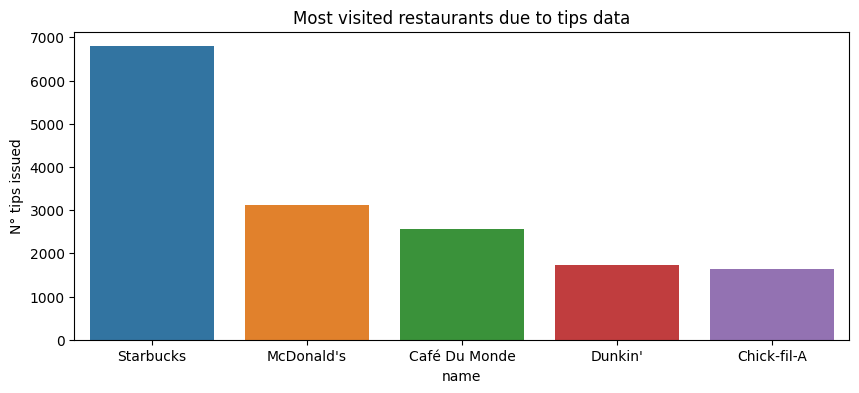

In [22]:
most_visited_byTip = tipRest.groupby(by=['name'], as_index=False).count().sort_values(by='user_id', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=most_visited_byTip.nlargest(5, 'user_id'), x='name', y='user_id')
plt.ylabel('N° tips issued')
plt.title('Most visited restaurants due to tips data')

plt.show()

### In order to make a word cloud we use the following piece of code

In [23]:
# Start with one review:
text = " ".join(review for review in tipRest.text)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

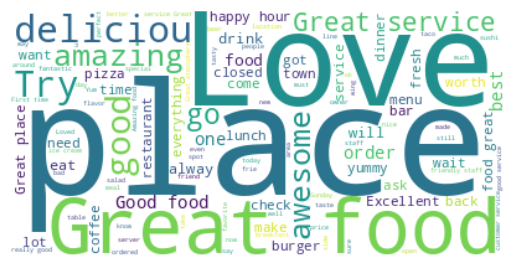

In [24]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### We apreciate that the most use words are positive words.

### We want to know what it is the distribution of tips by year

In [25]:
tipRest[tipRest['date'].dt.year.isin([2020,2021,2022,2023])]

,user_id,business_id,text,date,compliment_count,name
32,UbWdZLRtZ5Xc4vUjXuKOhA,QoezRbYQncpRqyrLH6Iqjg,One of the best Cubans in Tampa!!,2021-06-18 18:38:58,0,La Segunda Central Bakery
34,WroWA_0PNRecLHhWdlxpnw,QoezRbYQncpRqyrLH6Iqjg,They have FREE wifi,2020-08-13 13:50:43,0,La Segunda Central Bakery
35,HFmMg6R2zmUIYEugy32xlw,QoezRbYQncpRqyrLH6Iqjg,Delivery and ordering online was a breeze! Des...,2021-02-17 18:22:13,0,La Segunda Central Bakery
41,WLgY9EU9ZO4MyGz4pgJD1w,QoezRbYQncpRqyrLH6Iqjg,OMGOSH!!! Sandwiches are AMAZING. Worth the dr...,2021-04-24 10:22:48,0,La Segunda Central Bakery
42,uqeG5raUNqVmjXj6MPTD9A,QoezRbYQncpRqyrLH6Iqjg,Great coffee and sweets. They are very good on...,2020-12-29 22:12:58,0,La Segunda Central Bakery
...,...,...,...,...,...,...
717957,Z4sf5wh3Fp3fhln9sxSHJA,gapEmZHdwBivcHstKNweGQ,"Awesome place clean, friendly and it bucks the...",2020-01-24 18:25:34,0,Roastere EXPRESS
717967,1WS6Er_1U_RGPRHdETft7g,qFqEZ8dRDa46JSExbZudmg,"Yum, yum!!! Delicious donuts and unique flavor...",2020-12-19 20:59:02,0,Pharaoh’s Donuts
717968,fu0VsB5lPjsFqr-7h3DL0A,JPENuvcp3Zm0O5Fb6EsZTA,Best macaroons in St. Louis. Delightful store ...,2021-08-05 13:33:17,0,Le Macaron French Pastries
717971,J2-ahB-lJFoKzopulDTn-A,DWA7JiOvWZtTREq6-KA5jw,Excellent food and excellent service! When I'm...,2021-12-09 05:33:58,0,The Kitchen Table


In [26]:
tipRest[tipRest['date'].dt.year == 2016]

,user_id,business_id,text,date,compliment_count,name
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40,0,La Segunda Central Bakery
10,Ig2ttf1xX2Ihlm0nsykaTw,QoezRbYQncpRqyrLH6Iqjg,Great service. A Tampa staple.,2016-12-29 17:47:41,0,La Segunda Central Bakery
13,VL12EhEdT4OWqGq0nIqkzw,QoezRbYQncpRqyrLH6Iqjg,"Went in today for 4 loaves of Cuban bread, and...",2016-05-23 00:51:52,1,La Segunda Central Bakery
19,pwMtnmZqo4q36Ta4AQi3-g,QoezRbYQncpRqyrLH6Iqjg,Come early for fresh bread and pastries!!!,2016-01-19 03:07:38,0,La Segunda Central Bakery
27,K_u5ZEFmyJgma8iD78bY0g,QoezRbYQncpRqyrLH6Iqjg,Went to La Segunda Central on 7/21/16 to order...,2016-07-24 00:19:34,0,La Segunda Central Bakery
...,...,...,...,...,...,...
717895,V56j9QLBVoITcbwQKJp4Xw,YUUMXtU66B4rxwJohSQm7A,"Good cookie, not worth an hour and 45 minute w...",2016-05-16 07:02:15,0,Tucson Cookie
717908,zlXuZbb_oFfmL7arS1HDzw,uNjbxHcMGnXh8P99hWkmBg,They charge a ton for extra toppings.,2016-08-07 19:19:50,0,Little Caesars Pizza
717945,grAy0XfSovYlzfkj-LPeaA,jVNdNPCkuqGYXqsfmxKZdw,If u don't care waiting for a long ass time fo...,2016-10-20 03:15:01,0,Burger King
717952,Cb3wUXThCHlPupIz2hnx7Q,o6nEaC1G1WJpvU86SBX97w,Let's just say I have no plans on returning.,2016-09-23 22:35:46,0,KFC


### The most tips was issued before 2019. Below is shown a barplot with tips per year

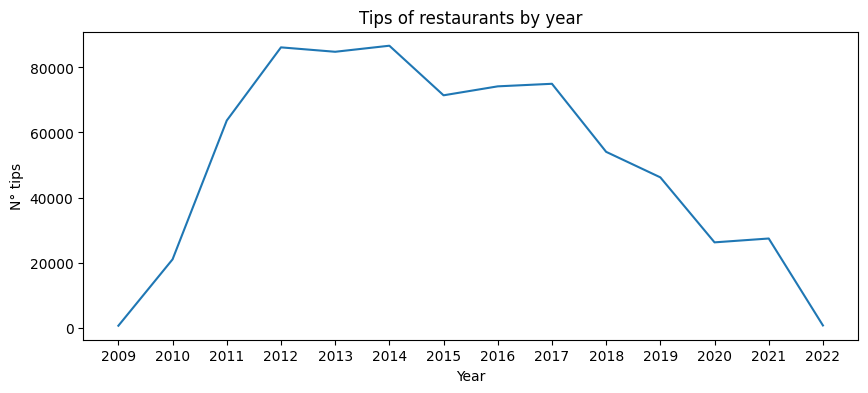

In [27]:
tipRest_byYear = tipRest.groupby(by=tipRest.date.dt.year).count()

plt.figure(figsize=(10,4), dpi=100)
sns.lineplot(
    data=tipRest_byYear,
    x=tipRest_byYear.index,
    y='user_id'
)
plt.ylabel('N° tips')
plt.xlabel('Year')
plt.title('Tips of restaurants by year')
plt.xticks(tipRest_byYear.index)

plt.show()

### Starbucks lead number of tips

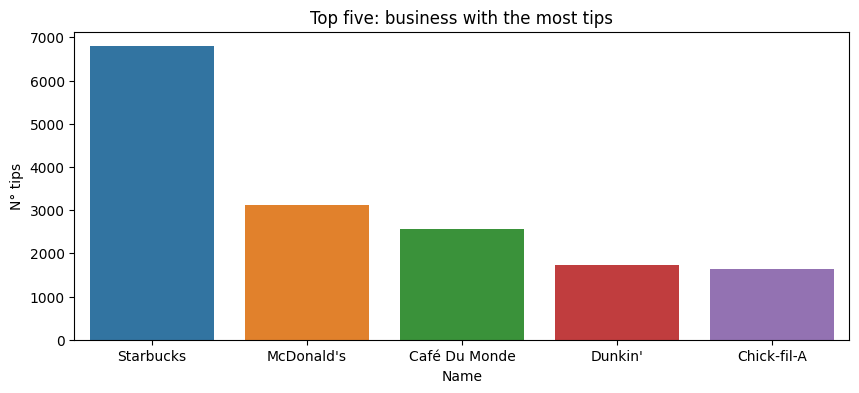

In [28]:
theMost_tipRest = tipRest.groupby(by='name', as_index=False).count()

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(
    data=theMost_tipRest.nlargest(5, 'user_id'),
    x='name',
    y='user_id'
)
plt.ylabel('N° tips')
plt.xlabel('Name')
plt.title('Top five: business with the most tips')

plt.show()

# EDA to user file

In [23]:
# Read the the file user.parquet
user_yelp = pd.read_parquet('/content/drive/MyDrive/Yelp/user.parquet')

# Print the table
print("Table: \n")
display(user_yelp.head())

# Print the info
display(user_yelp.info())

Table: 



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


None

In [24]:
# Delete duplicated
user_yelp.drop_duplicates(inplace=True)
user_yelp.reset_index(drop=True, inplace=True)
user_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


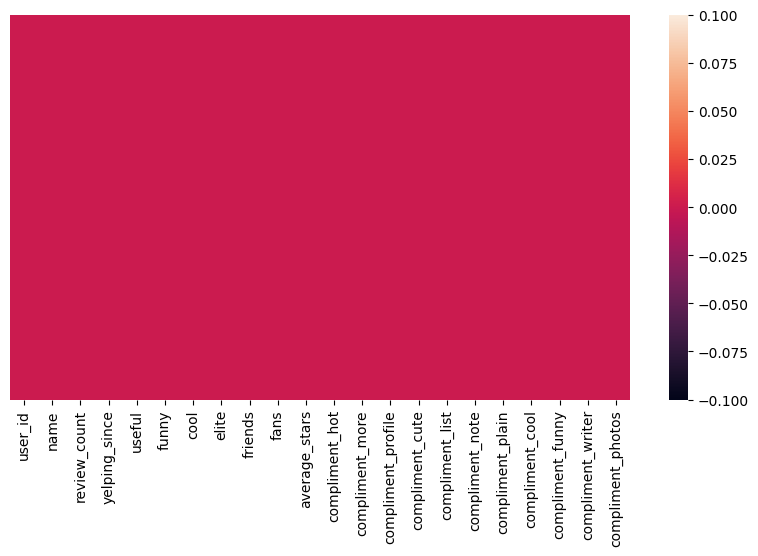

In [31]:
# plot the null values
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=user_yelp.isnull(), yticklabels=False)

plt.show()

In [25]:
user_yelp.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


In [29]:
# Convert data type
user_yelp['yelping_since'] = pd.to_datetime(user_yelp['yelping_since'])

In [30]:
# New users by year
userEntries_byYear = user_yelp.groupby(user_yelp.yelping_since.dt.year).agg({'user_id': 'count'})
userEntries_byYear

,user_id
yelping_since,
2004,90
2005,937
2006,5423
2007,15340
2008,31097
2009,64911
2010,109054
2011,176435
2012,195955


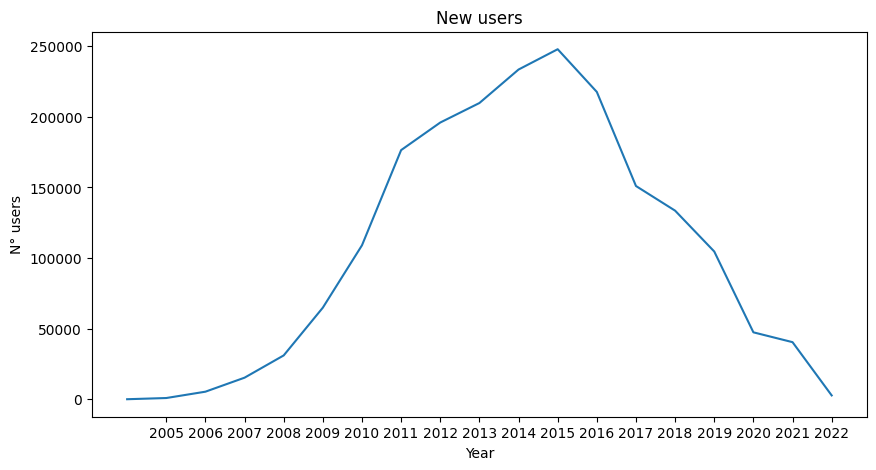

In [32]:
# We do the plot stars mean
plt.figure(figsize=(10,5), dpi=100)
sns.lineplot(data=userEntries_byYear, x=userEntries_byYear.index, y='user_id')
plt.ylabel('N° users')
plt.xlabel('Year')
plt.title('New users')
plt.xticks(starsMeanRev.index)


plt.show()

# **EDA review yelp**

## **Warning:** The following code block take data using BigQuery, so that we only run once.

In [ ]:
from google.cloud import bigquery

project_id = 'secret-bucksaw-407621'
client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT
    COUNT(*) as total
  FROM `secret-bucksaw-407621.secret_bucksaw_407621.rev`''').to_dataframe().total[0]

reviewYelp = client.query('''
  SELECT
    *
  FROM
    `secret-bucksaw-407621.secret_bucksaw_407621.rev`
''').to_dataframe()

print('Full dataset has %d rows' % row_count)

Full dataset has 6990280 rows


### We only want the review of business with categories Food or Restaurant, hence we make a merge

In [ ]:
reviewYelp_rest = reviewYelp.merge(rest['business_id'], on='business_id')

In [ ]:
# Print the info
reviewYelp_rest.info()

NameError: ignored

### In order to save credits on Google Cloud Platform we save the dataFrame ```reviewYelp_rest``` on .parquet format, so that the query won't be run anymore



In [ ]:
# save dataframe
reviewYelp_rest.to_parquet('revYelp_rest.parquet')

# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### After save the new review file, we only read the data from local

In [12]:
# Load the data
reviewYelp_rest = pd.read_parquet('/content/drive/MyDrive/revYelp/revYelp_rest.parquet')

In [13]:
#Check out the data
reviewYelp_rest.head()

,text,cool,stars,date,funny,review_id,useful,business_id,user_id
0,Stopped by on a whim today and let me break it...,2,5.0,2017-12-14 06:12:45+00:00,0,b7DV2kUtmRJ4WVyHXM9_eQ,5,NhdOYwSgspPUVcYakaN3XQ,AOlS3S-rdbPNuPTgMswR9A
1,The catfish combo was edible but bland. I requ...,0,2.0,2015-07-12 03:26:34+00:00,0,ynLK-05rN32nXliANVJHjw,1,NhdOYwSgspPUVcYakaN3XQ,F-_McRHp0jMU7T-v6x565w
2,So I've been wanting to try this place for 8 y...,3,5.0,2019-12-11 13:12:34+00:00,4,niO6VRDjSh42EYtKeWIhsw,8,NhdOYwSgspPUVcYakaN3XQ,b7Wmb1hn_6f17p-5H8tPkA
3,Another hole in the wall that now has my heart...,1,5.0,2022-01-01 02:11:07+00:00,1,JNKNgpA9R-t7-Dk-yETuPA,2,NhdOYwSgspPUVcYakaN3XQ,rk1pddKpbr3W-8xYWhc6xQ
4,Great fish sandwiches but a little over priced...,0,4.0,2014-08-24 23:27:52+00:00,0,jghd5KJ25kLSHv0Im_j1mw,0,NhdOYwSgspPUVcYakaN3XQ,XL9TbHg1NJ9fsgq4fy4gxw


In [14]:
# Print the info
reviewYelp_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117728 entries, 0 to 5117727
Data columns (total 9 columns):
 #   Column       Dtype              
---  ------       -----              
 0   text         object             
 1   cool         Int64              
 2   stars        float64            
 3   date         datetime64[ns, UTC]
 4   funny        Int64              
 5   review_id    object             
 6   useful       Int64              
 7   business_id  object             
 8   user_id      object             
dtypes: Int64(3), datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 405.1+ MB


In [15]:
# Check out the nulls
reviewYelp_rest.isnull().value_counts()

text   cool   stars  date   funny  review_id  useful  business_id  user_id
False  False  False  False  False  False      False   False        False      5117728
dtype: int64

In [16]:
# Check out the duplicated
reviewYelp_rest.duplicated().value_counts()

False    5117728
dtype: int64

In [17]:
# Stars mean by year
starsMeanRev = reviewYelp_rest.groupby(reviewYelp_rest.date.dt.year).agg({'stars': 'mean'})
starsMeanRev

,stars
date,
2005,3.965944
2006,3.978588
2007,3.857118
2008,3.772940
2009,3.700778
2010,3.709885
2011,3.701970
2012,3.689562
2013,3.702850


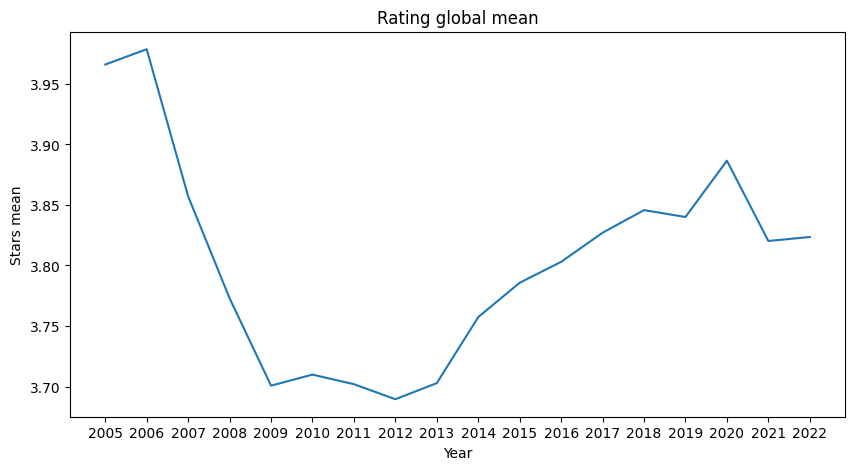

In [18]:
# We do the plot stars mean
plt.figure(figsize=(10,5), dpi=100)
sns.lineplot(data=starsMeanRev, x=starsMeanRev.index, y='stars')
plt.ylabel('Stars mean')
plt.xlabel('Year')
plt.title('Rating global mean')
plt.xticks(starsMeanRev.index)


plt.show()

### We can apreciate that between the years 2009 and 2013 the rating global mean was minimum.

### We want how many reviews by year we have available

In [19]:
# Stars mean by year
revCount_byYear = reviewYelp_rest.groupby(reviewYelp_rest.date.dt.year).agg({'review_id': 'count'})
revCount_byYear

,review_id
date,
2005,646
2006,2989
2007,11520
2008,35396
2009,58241
2010,108295
2011,177318
2012,216001
2013,283927


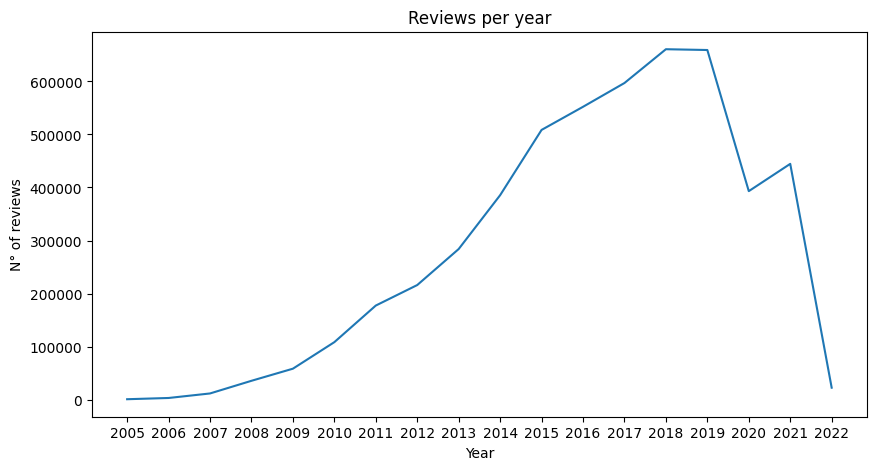

In [20]:
# We do the plot stars mean
plt.figure(figsize=(10,5), dpi=100)
sns.lineplot(data=revCount_byYear, x=revCount_byYear.index, y='review_id')
plt.ylabel('N° of reviews')
plt.xlabel('Year')
plt.title('Reviews per year')
plt.xticks(revCount_byYear.index)

plt.show()

### We ca appreciate that in 2018 the reviews was maximum, i.e., the most of visites was in 2018, from there the reviews was decreasing.

### We want to know which business have the most reviews

In [21]:
theMostReviewed_inRev = reviewYelp_rest.groupby(by='business_id', as_index=False).agg(
    total_rev=('review_id', 'count'), stars_mean=('stars', 'mean')
).sort_values(by='total_rev', ascending=False)
theMostReviewed_inRev = theMostReviewed_inRev.merge(rest[['business_id', 'name', 'city']], on='business_id')
theMostReviewed_inRev[theMostReviewed_inRev['total_rev']>4000]

,business_id,total_rev,stars_mean,name,city
0,_ab50qdWOk0DdB6XOrBitw,7673,4.124984,Acme Oyster House,NEW ORLEANS
1,ac1AeYqs8Z4_e2X5M3if2A,7516,4.146221,Oceana Grill,NEW ORLEANS
2,GXFMD0Z4jEVZBCsbPf4CTQ,6160,4.446266,Hattie B’s Hot Chicken - Nashville,NASHVILLE
3,ytynqOUb3hjKeJfRj5Tshw,5778,4.605400,Reading Terminal Market,PHILADELPHIA
4,oBNrLz4EDhiscSlbOl8uAw,5264,4.291223,Ruby Slipper - New Orleans,NEW ORLEANS
5,iSRTaT9WngzB8JJ2YKJUig,5254,3.438713,Mother's Restaurant,NEW ORLEANS
6,VQcCL9PiNL_wkGf-uF3fjg,5146,3.786630,Royal House,NEW ORLEANS
7,_C7QiQQc47AOEv4PE3Kong,4969,4.292010,Commander's Palace,NEW ORLEANS
8,GBTPC53ZrG1ZBY3DT8Mbcw,4661,4.177430,Luke,NEW ORLEANS
9,6a4gLLFSgr-Q6CZXDLzBGQ,4480,4.186384,Cochon,NEW ORLEANS


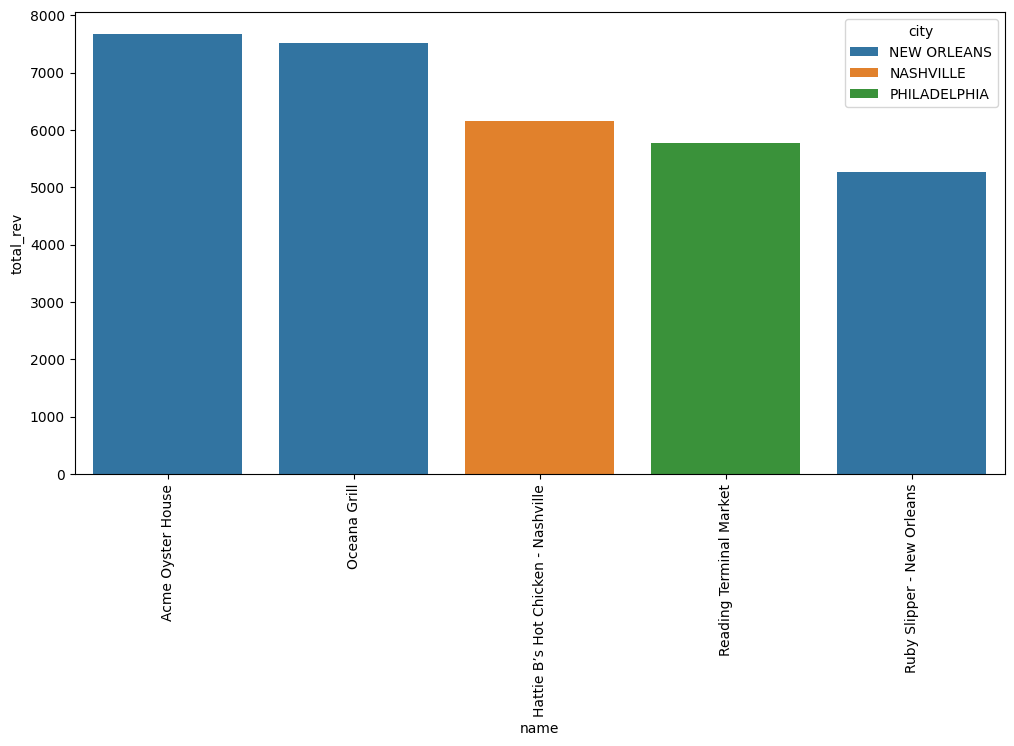

In [22]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(
    data=theMostReviewed_inRev.nlargest(5, 'total_rev'),
    x='name',
    y='total_rev',
    hue='city',
    dodge=False
)
plt.xticks(rotation=90)

plt.show()

### The most busines with more reviews and high rate is in New Orleans